In [48]:
import sys
sys.path.insert(1, '../scripts')
import project_functions
import pandas as pd
dataclean = project_functions.load_and_process()
display(dataclean.head())
print(dataclean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None
../scr

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             6825 non-null   string  
 1   Platform         6825 non-null   category
 2   Year_of_Release  6825 non-null   int64   
 3   Genre            6825 non-null   category
 4   Publisher        6825 non-null   string  
 5   NA_Sales         6825 non-null   float64 
 6   EU_Sales         6825 non-null   float64 
 7   JP_Sales         6825 non-null   float64 
 8   Other_Sales      6825 non-null   float64 
 9   Global_Sales     6825 non-null   float64 
 10  Critic_Score     6825 non-null   float64 
 11  Critic_Count     6825 non-null   float64 
 12  User_Score       6825 non-null   float64 
 13  User_Count       6825 non-null   float64 
 14  Developer        6825 non-null   string  
 15  Rating           6825 non-null   category
dtypes: category(3), float64(9), int64(1), stri

<AxesSubplot:title={'center':'Total Sales Each Year '}, xlabel='Year', ylabel='(Millions Per Units Sold)'>

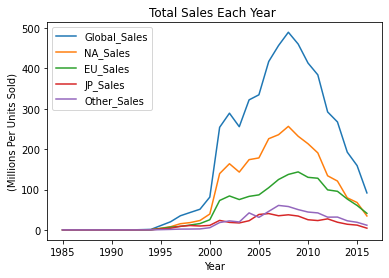

In [73]:

# __EDA TOPICS__
# ***
#- The correlation of years and game sales
#- The correlation between older generation games and newer games
#- The companies which has the most sales, Average Sales Per Game?

#_The Correlation of years and games_

dataYearsGameGlobal = dataclean[["Global_Sales","Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
dataYearsGameGlobalSum = dataYearsGameGlobal.groupby(['Year_of_Release']).sum()
dataYearsGameGlobalSum.plot.line(title = "Total Sales Each Year ",ylabel="(Millions Per Units Sold)", xlabel= "Year")
#We notice a 2 spike between the years of 2000-2003 and 2005-2010 , we notice a huge spike of games 


<AxesSubplot:title={'center':'Average Sales Each Year'}, xlabel='Year_of_Release', ylabel='Millions Per Units Sold'>

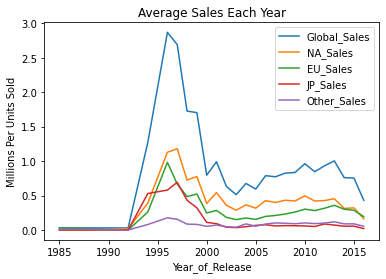

In [70]:
dataYearsGameGlobalMean = dataYearsGameGlobal.groupby(['Year_of_Release']).mean()
dataYearsGameGlobalMean.head(10)
dataYearsGameGlobalMean.plot.line(title = "Average Sales Each Year", ylabel="Millions Per Units Sold")

<AxesSubplot:title={'center':'Average Number of Sales per Publisher (Top 10)'}, xlabel='Publisher', ylabel='Millions per Unit'>

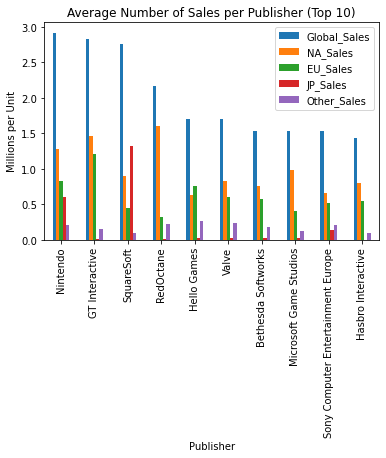

In [86]:

#_The Companies which have the most sales per Game_
dataCompaniesMean = dataclean[["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Publisher"]]
dataCompaniesMean = dataCompaniesMean.groupby(['Publisher']).mean()
numberOfEntries =10
dataCompaniesMeanGlobal= dataCompaniesMean.sort_values(by='Global_Sales', ascending=False).head(numberOfEntries)
dataCompaniesMeanNA = dataCompaniesMean.sort_values(by='NA_Sales', ascending=False).head(numberOfEntries )
dataCompaniesMeanEU = dataCompaniesMean.sort_values(by='EU_Sales', ascending=False).head(numberOfEntries )
dataCompaniesMeanJP = dataCompaniesMean.sort_values(by='JP_Sales', ascending=False).head(numberOfEntries )
dataCompaniesMeanOther = dataCompaniesMean.sort_values(by='Other_Sales', ascending=False).head(numberOfEntries )
topCompaniesMean=pd.concat([dataCompaniesMeanGlobal, dataCompaniesMeanNA,dataCompaniesMeanEU,dataCompaniesMeanJP,dataCompaniesMeanOther])
topCompaniesMean= topCompaniesMean.drop_duplicates()
topCompaniesMean= topCompaniesMean.head(10)
#The Publisher with the Most Sales per Game Globally is: Nintendo
#The Publisher with the Most Sales per Game in North America is: RedOctane
#The Publisher with the Most Sales per Game in Europe is: GT Interactive
#The Publisher with the Most Sales per Game in Japan is: SquareSoft
#The Publisher with the Most Sales per Game in Other Regions is: Hello Games		
topCompaniesMean.plot.bar(title="Average Number of Sales per Publisher (Top 10)", ylabel = "Millions per Unit")

<AxesSubplot:title={'center':'Total Number of Sales for Each Publisher(Top 10)'}, xlabel='Publisher', ylabel='(Million Units Sold)'>

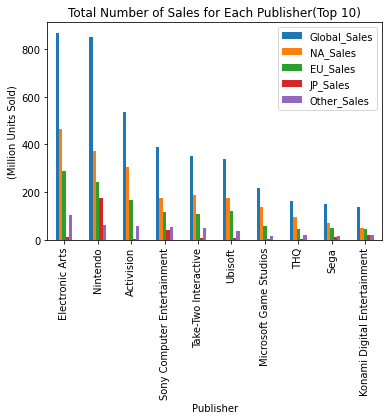

In [83]:
#_The Companies which have the most sales
dataCompaniesSum = dataclean[["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Publisher"]]
dataCompaniesSum = dataCompaniesSum.groupby('Publisher').sum()

numberOfEntries=10
topCompaniesSumGlobal =dataCompaniesSum.nlargest(numberOfEntries, 'Global_Sales')
topCompaniesSumNA.nlargest(numberOfEntries, 'NA_Sales')
topCompaniesSumEU =dataCompaniesSum.nlargest(numberOfEntries, 'EU_Sales')
topCompaniesSumJP =dataCompaniesSum.nlargest(numberOfEntries, 'JP_Sales')
topCompaniesSumOther =dataCompaniesSum.nlargest(numberOfEntries, 'Other_Sales')

topCompaniesSum =pd.concat([topCompaniesSumGlobal,topCompaniesSumNA, topCompaniesSumEU, topCompaniesSumJP, topCompaniesSumOther])
topCompaniesSum=topCompanies.drop_duplicates()
topCompaniesSum= topCompaniesSum.head(10)

#The Publisher with the most Sales Globally between 1985-2016 is: Electronic Arts
#The Publisher with the most Sales in North America between 1985-2016 is: Electronic Arts
#The Publisher with the most Sales in Europe between 1985-2016 is: Electronic Arts
#The Publisher with the most Sales in Japan between 1985-2016 is: Nintendo
#The Publisher with the most Sales in Other Regions between 1985-2016 is: Electronic Arts

topCompaniesSum.plot.bar(title="Total Number of Sales for Each Publisher(Top 10)", ylabel ="(Million Units Sold)")

<AxesSubplot:title={'center':'Number of Games Released Per Year'}, xlabel='Year_of_Release'>

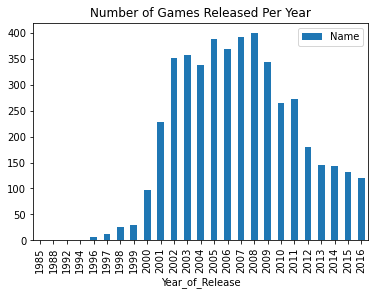

In [78]:
# The correlation between Older Games and Newer Game
dataYearsCount =  dataclean[["Year_of_Release","Name"]]
dataYearsCount = dataYearsCount.groupby("Year_of_Release").nunique()
dataYearsCount.plot.bar(title="Number of Games Released Per Year" )
#In 2008, The number of Games released was 399